In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/assignments/AAL%20KNN%20regression%20and%20OLS/AAL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,28.559999,28.790001,27.700001,27.770000,27.578360,15507800
1,2019-09-17,28.020000,29.250000,27.920000,28.639999,28.442356,12683400
2,2019-09-18,28.549999,28.660000,28.070000,28.600000,28.402632,6129400
3,2019-09-19,28.629999,28.740000,28.160000,28.299999,28.104702,5102700
4,2019-09-20,28.200001,28.440001,27.959999,27.990000,27.796841,6885400


In [3]:
df.reset_index(inplace=True)
df.describe()

,index,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,125.000000,19.796733,20.264422,19.242629,19.695936,19.642845,4.861767e+07
std,72.601653,7.932438,7.878992,7.983885,7.959546,7.902460,5.296885e+07
min,0.000000,8.770000,9.190000,8.250000,9.040000,9.040000,2.373600e+06
25%,62.500000,12.395000,12.650000,11.545000,12.000000,12.000000,7.515550e+06
50%,125.000000,16.820000,17.670000,15.920000,16.740000,16.740000,4.370580e+07
75%,187.500000,27.985000,28.400000,27.650001,27.940001,27.823583,7.195250e+07
max,250.000000,31.420000,31.670000,31.000000,31.360001,31.143585,4.286171e+08


In [4]:
corr = df.corr(method='pearson')
corr

,index,Open,High,Low,Close,Adj Close,Volume
index,1.000000,-0.845183,-0.845758,-0.842302,-0.842764,-0.841010,0.616430
Open,-0.845183,1.000000,0.997324,0.997665,0.995992,0.995989,-0.624798
High,-0.845758,0.997324,1.000000,0.995857,0.997708,0.997748,-0.598153
Low,-0.842302,0.997665,0.995857,1.000000,0.997881,0.997822,-0.640366
Close,-0.842764,0.995992,0.997708,0.997881,1.000000,0.999984,-0.617717
Adj Close,-0.841010,0.995989,0.997748,0.997822,0.999984,1.000000,-0.616984
Volume,0.616430,-0.624798,-0.598153,-0.640366,-0.617717,-0.616984,1.000000


<AxesSubplot:>

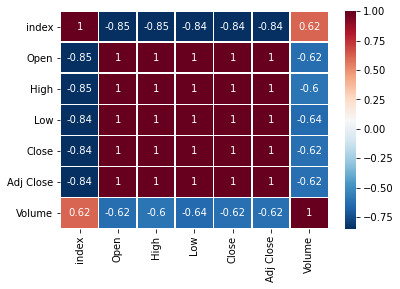

In [5]:
import seaborn as sns
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,
           cmap='RdBu_r', annot=True, linewidth=0.5)

In [6]:
aal_df = df[["Date", 'High', 'Open', 'Low', 'Close']]
aal_df.head()

,Date,High,Open,Low,Close
0,2019-09-16,28.790001,28.559999,27.700001,27.770000
1,2019-09-17,29.250000,28.020000,27.920000,28.639999
2,2019-09-18,28.660000,28.549999,28.070000,28.600000
3,2019-09-19,28.740000,28.629999,28.160000,28.299999
4,2019-09-20,28.440001,28.200001,27.959999,27.990000


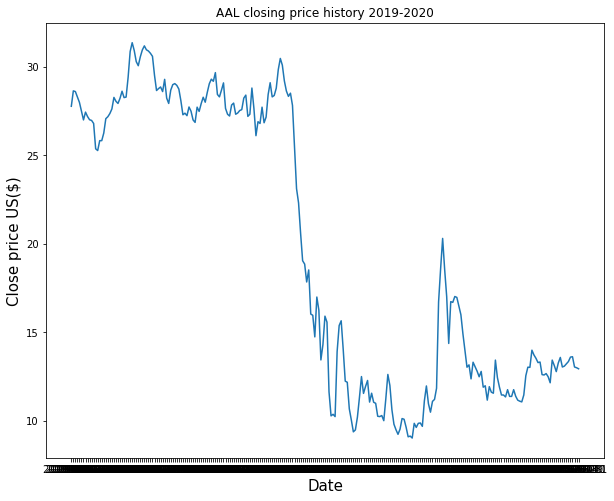

In [7]:
plt.figure(figsize=(10, 8))
plt.title('AAL closing price history 2019-2020')
plt.plot(aal_df['Date'], aal_df['Close'])
plt.xlabel("Date", fontsize = 15)
plt.ylabel('Close price US($)', fontsize = 15)
plt.style.use('fivethirtyeight')
plt.show()

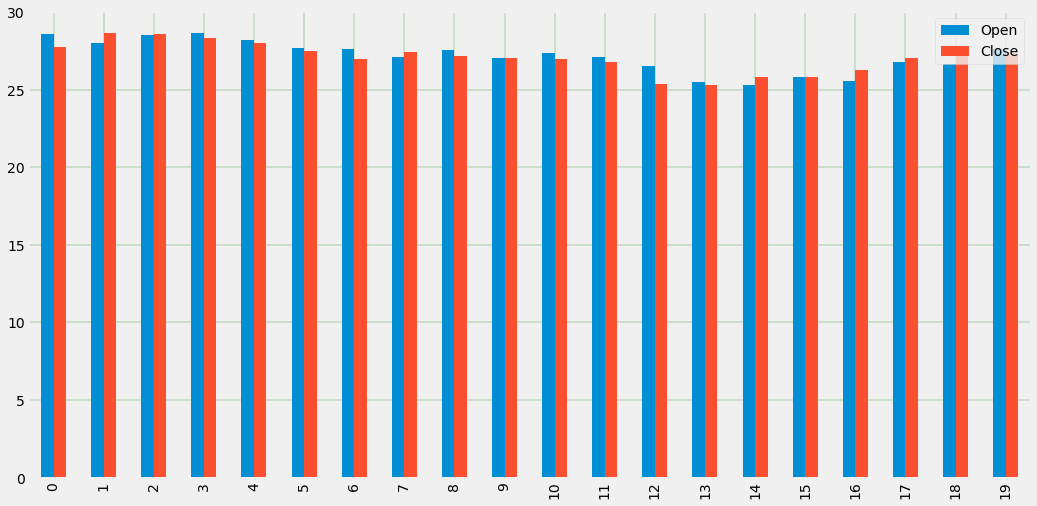

In [8]:
#plot open vs close
aal_df[['Open', 'Close']].head(20).plot(kind='bar', figsize=(16, 8))
plt.grid(which='major', linestyle='-', linewidth='0.3', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.show()

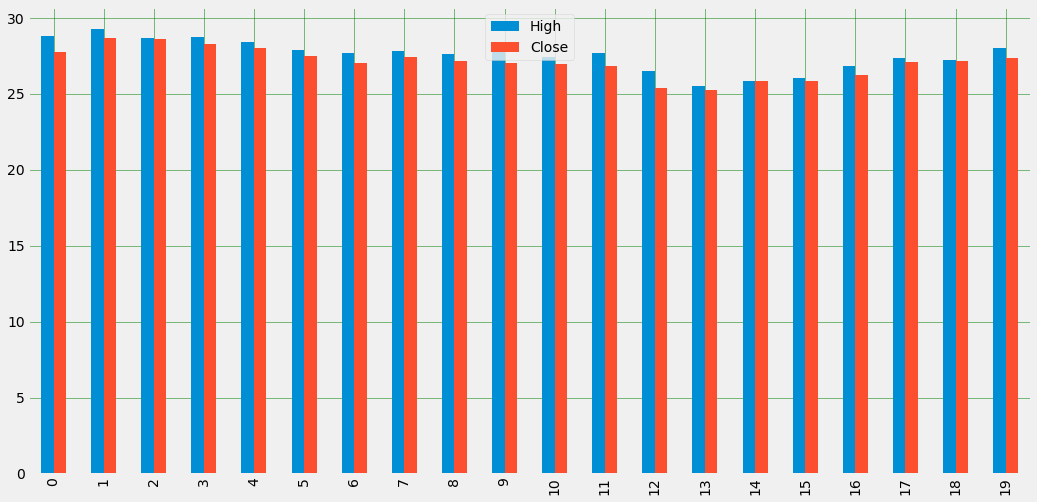

In [9]:
#Plot High vs Close
aal_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

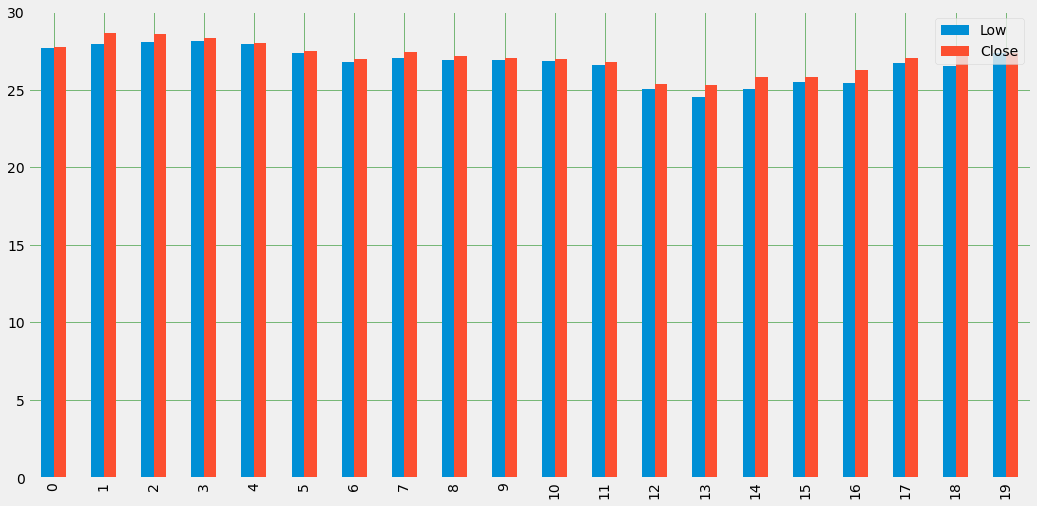

In [10]:
#Plot Low vs Close
aal_df[['Low', 'Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle= '-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#omg, on this plot i see that for the most part close is higher than the low of the day!

In [11]:
aal_df['Date'] = pd.to_datetime(aal_df['Date'])
aal_df['year']=df['Date'].dt.year
aal_df['month']=df['Date'].dt.month
aal_df['day']=df['Date'].dt.day

<ipython-input-11-5ef4a2e7f59f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aal_df['Date'] = pd.to_datetime(aal_df['Date'])


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
aal_df=aal_df[['day', 'month', 'year', 'High', 'Open', 'Low', 'Close']]
aal_df.head()

In [ ]:

#separate Independent and dependent variable

X = aal_df.iloc[:, aal_df.columns !='Close']
y = aal_df.iloc[:, 5]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
#Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_train.shape)
print(X_train.shape)

#y_test to be evaluated with y_pred for diff models

In [ ]:
#KNN K-nearest neighbor Regression Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_model = knn_regressor.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

In [ ]:
#knn cross validation

from sklearn.cross_validation import train_test_split
knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print('Accuracy: ', results_kfold.mean()*100)

In [ ]:
plot_aal_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_aal_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which=’major’, linestyle='', linewidth='0.5', color='green')
plt.grid(which=’minor’, linestyle=’:’, linewidth='0.5', color='black')
plt.show()